In [9]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

torch.manual_seed(1)

LR = 1  # 学习率
iteration = 10
max_epoch = 200

weights = torch.tensor(1, requires_grad=True, dtype=torch.float32)
target = torch.zeros(1)

optimizer = optim.SGD([weights], lr=LR, momentum=0.9)
# Decays the learning rate of each parameter group by gamma every step_size epochs.
scheduler_lr = optim.lr_scheduler.StepLR(optimizer,  # 调节的是优化器lr参数
                                         step_size=50,  # step_size (int) – Period of learning rate decay.
                                         gamma=0.1)  # last_epoch (int) – The index of last epoch. Default: -1.

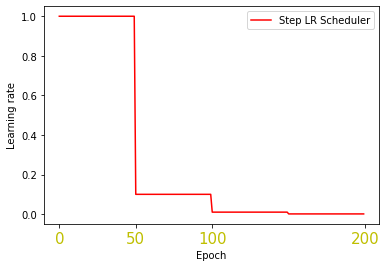

In [10]:
lr_list, epoch_list = list(), list()
for epoch in range(max_epoch):
    lr_list.append(optimizer.param_groups[0]['lr'])
    epoch_list.append(epoch)
    for step, _ in enumerate(range(iteration)):
        loss = torch.pow((weights - target), 2)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # scheduler_lr.step()  # 每个step进行一次学习调整
    scheduler_lr.step()  # 每个epoch进行一次学习率调整

plt.plot(epoch_list, lr_list, label="Step LR Scheduler", color='red')
plt.xticks([0, 50, 100, 200], color='y', size=15)
plt.xlabel("Epoch")
plt.ylabel("Learning rate")
plt.legend()
plt.show()